# Titanic: Machine Learning Project

## 1. Problem statement
The sinking of the Titanic in 1912 remains one of the most worst disasters in history. While the fate of many passengers and crew members is known, there is ongoing interest in predicting survival outcomes based on various factors. In this machine learning project, the goal is to develop a predictive model that can accurately determine whether a passenger survived or not.

## 2. Objective

The primary goal is to deploy artificial intelligence techniques, specifically machine learning models, to predict whether a passenger survived or not during the Titanic disaster.

## 3. Data Preprocessing

### Imports Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/dataset.csv')

df.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Gender       1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [4]:
df['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [5]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

### Encode columns to be numerical

In [6]:
mapping = {'male': 1, 'female': 0}
df['isMale'] = df['Gender'].replace(mapping)

mapping = {'C': 0, 'Q': 1, 'S': 2}
df['Embarked'] = df['Embarked'].replace(mapping)

In [7]:
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
isMale            0
dtype: int64

<Axes: >

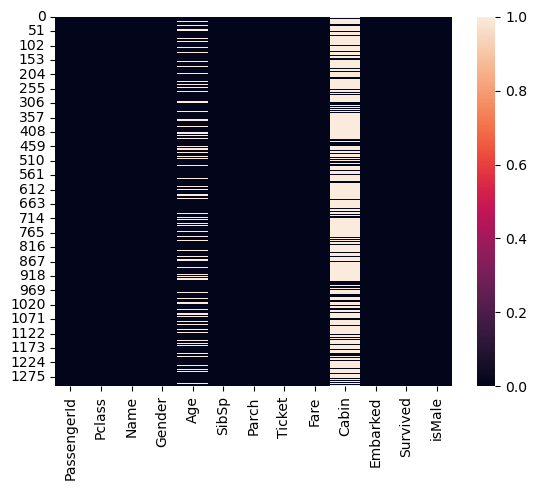

In [8]:
sns.heatmap(df.isna())

### Handling missing data

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mode()) # fill null data with mode of ages
df.drop(['Cabin','PassengerId','Name','Gender','Ticket'],axis=1,inplace=True) # don't need this column
df = df.dropna()

df.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
isMale      0
dtype: int64

<Axes: >

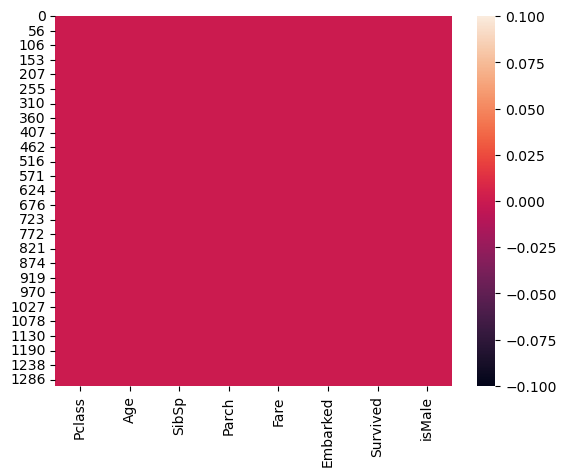

In [10]:
sns.heatmap(df.isna())

In [11]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,isMale
0,3,22.0,1,0,7.2500,2.0,0,1
1,1,38.0,1,0,71.2833,0.0,1,0
2,3,26.0,0,0,7.9250,2.0,1,0
3,1,35.0,1,0,53.1000,2.0,1,0
4,3,35.0,0,0,8.0500,2.0,0,1


### Plotting the Countplot to visualize the numbers

<Axes: xlabel='isMale', ylabel='count'>

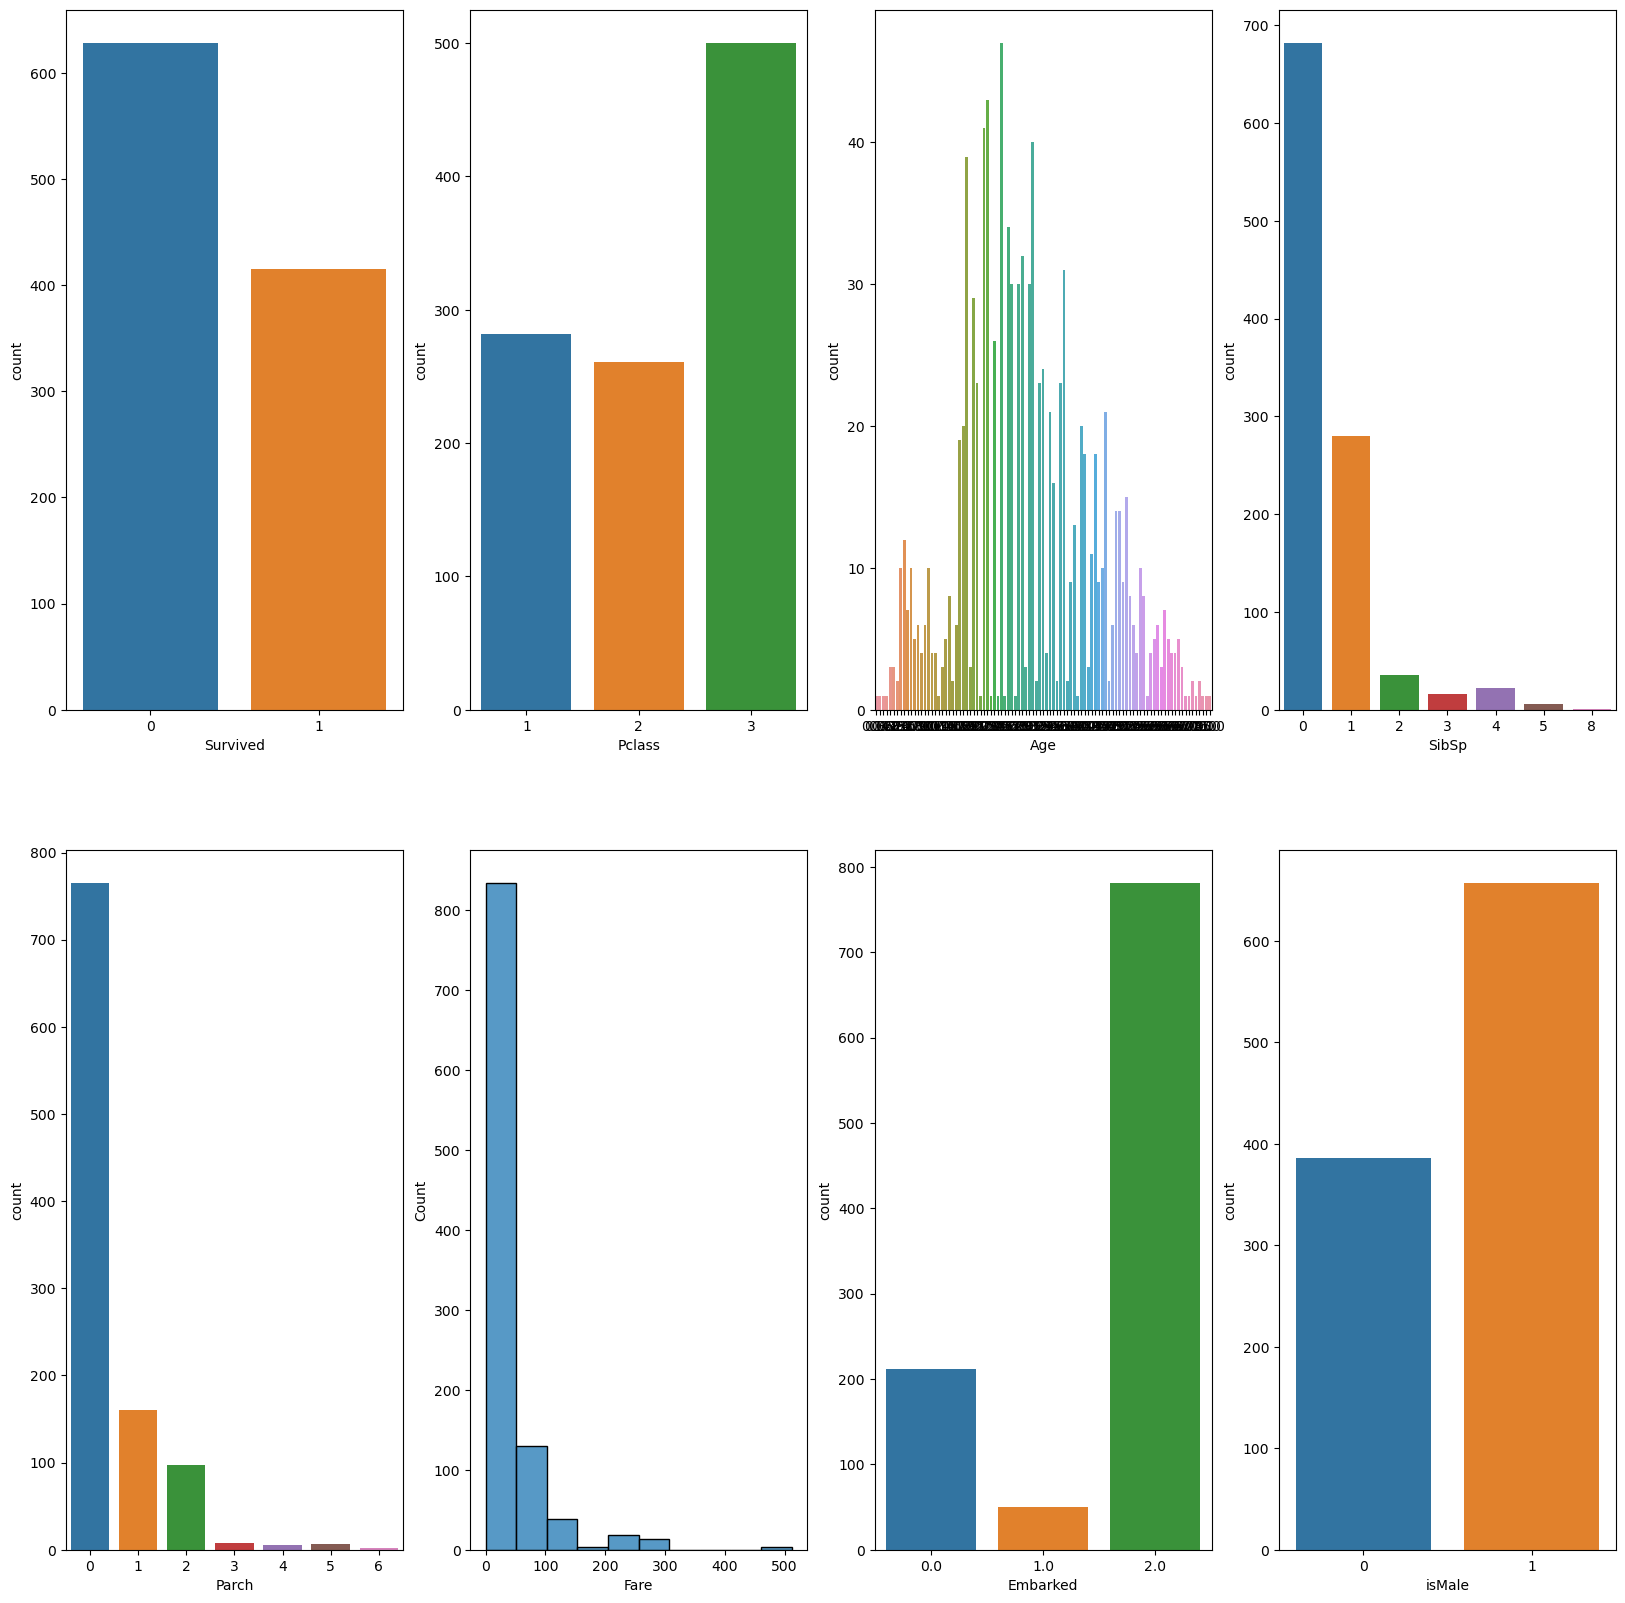

In [12]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1])
sns.countplot(x = 'Age', data = df, ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, ax=ax[1,0])
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1])
sns.countplot(x = 'Embarked', data = df, ax=ax[1,2])
sns.countplot(x = 'isMale', data = df, ax=ax[1,3])

<Axes: xlabel='Survived', ylabel='count'>

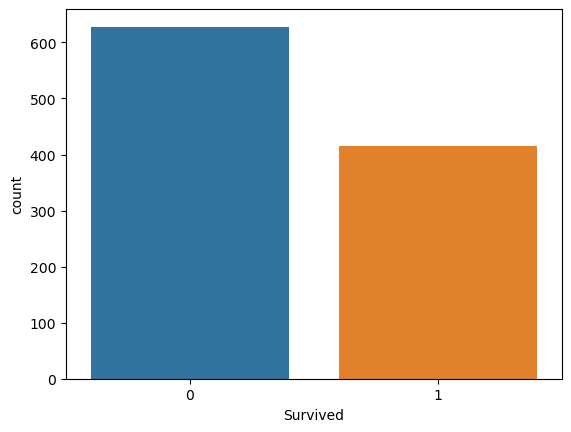

In [13]:
sns.countplot(df,x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

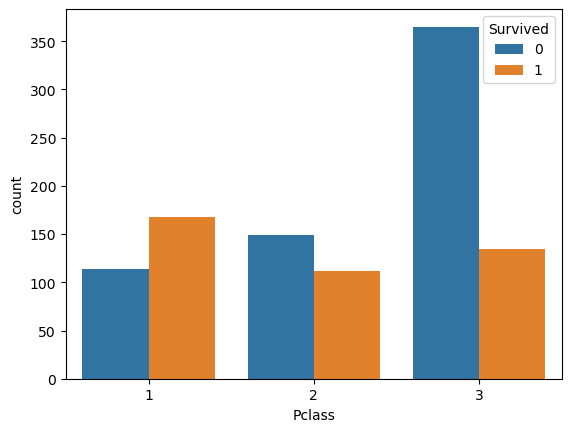

In [14]:
sns.countplot(df,x='Pclass',hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

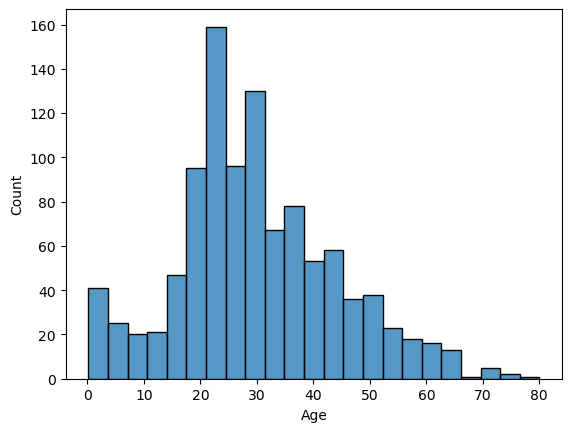

In [15]:
sns.histplot(df['Age'])

<Axes: xlabel='SibSp', ylabel='count'>

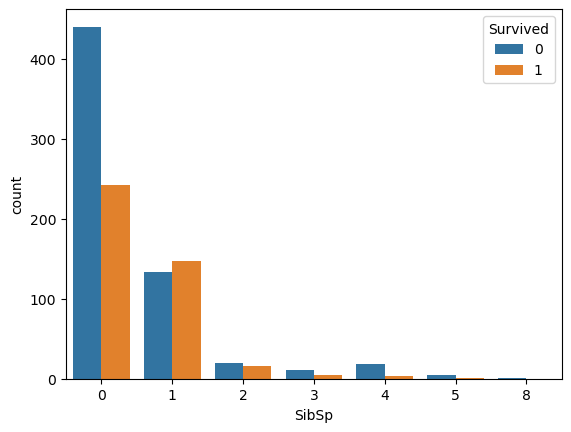

In [16]:
sns.countplot(df,x='SibSp',hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

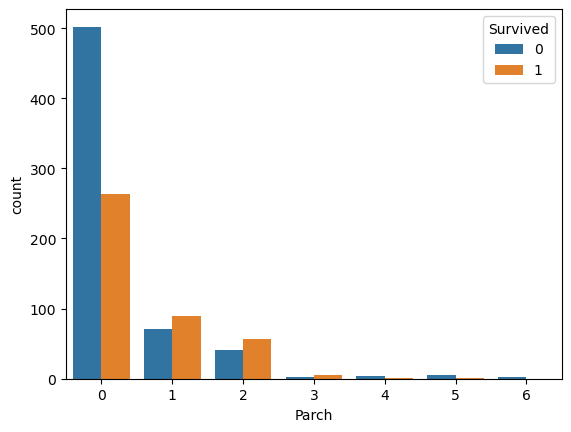

In [17]:
sns.countplot(df,x='Parch',hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

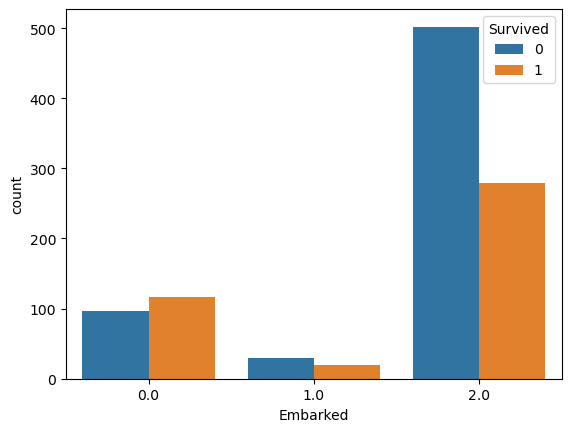

In [18]:
sns.countplot(df,x='Embarked',hue='Survived')

<Axes: xlabel='isMale', ylabel='count'>

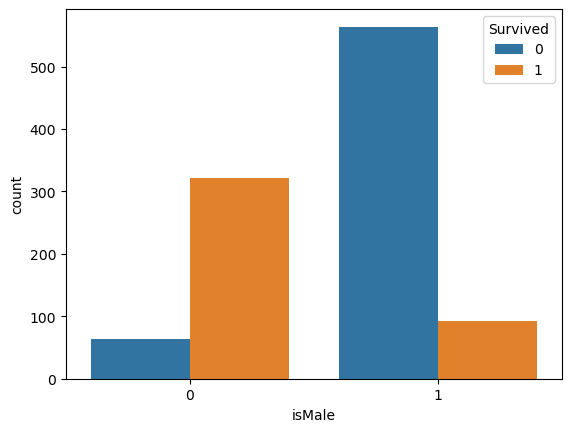

In [19]:
sns.countplot(df,x='isMale',hue='Survived')

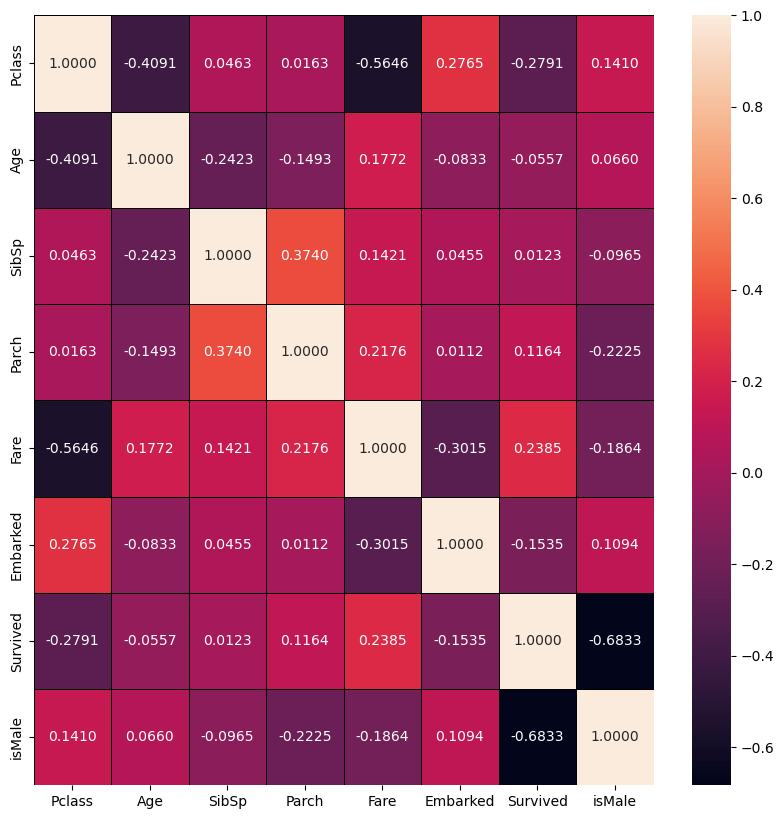

In [20]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

## 4. Model Development

In [21]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## prepare pipelining

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Embarked','isMale']
categorical_features = []

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

accuracy_scores = {'Classifier': [], 'Before Pipeline': [], 'After Pipeline': []}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    before_pipeline_score = clf.score(X_test, y_test)*100
    
    pip_classifier = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])
    pip_classifier.fit(X_train, y_train)
    after_pipeline_score = pip_classifier.score(X_test, y_test)*100
    
    accuracy_scores['Classifier'].append(clf_name)
    accuracy_scores['Before Pipeline'].append(before_pipeline_score)
    accuracy_scores['After Pipeline'].append(after_pipeline_score)

accuracy_df = pd.DataFrame(accuracy_scores)

In [24]:
accuracy_df

,Classifier,Before Pipeline,After Pipeline
0,Logistic Regression,86.602871,86.124402
1,SVM,68.421053,88.516746
2,KNN,69.377990,83.732057
3,Decision Tree,80.382775,80.382775
4,Random Forest,83.253589,83.253589
